# TPS May 2022

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [65]:
seed = 20052022

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [66]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [68]:
train.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765474,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [69]:
train.f_27.value_counts()

BBBBBBCJBC    12
BCBBBBCLBC    12
BBBBBBDPCB    10
BBBBBBDKBC    10
ADBBBACQBC    10
              ..
BFAFAADTCE     1
BBBDAACOAE     1
BBABAACGBB     1
BFAABAGSDB     1
BCAACADSCE     1
Name: f_27, Length: 741354, dtype: int64

<AxesSubplot:xlabel='f_26', ylabel='Count'>

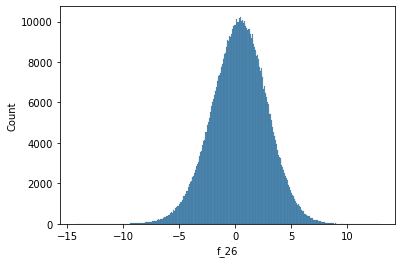

In [70]:
sns.histplot(data=train, x="f_26")


<AxesSubplot:xlabel='target', ylabel='count'>

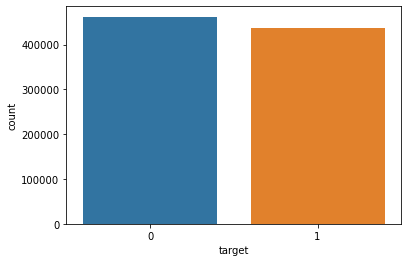

In [71]:
sns.countplot(data=train, x="target")

In [72]:
train_mod = train.drop(columns=['f_27'])
test_mod = test.drop(columns=['f_27'])

In [73]:
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [74]:
columns = test_mod.columns[1:]
columns

Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_28', 'f_29', 'f_30'],
      dtype='object')

In [75]:
target = train_mod['target'].values
train_oof = np.zeros((train.shape[0],))
test_preds = 0
train_oof.shape

(900000,)

In [76]:
test_mod[columns].values

array([[ 4.42516887e-01,  1.74380235e-01, -9.99815925e-01, ...,
         9.94784193e+01,  0.00000000e+00,  0.00000000e+00],
       [-6.05597556e-01, -3.05714509e-01,  6.27667253e-01, ...,
        -6.59938255e+01,  1.00000000e+00,  0.00000000e+00],
       [ 3.03989726e-01,  2.44511024e+00,  2.46514539e-01, ...,
        -8.74056220e+01,  0.00000000e+00,  1.00000000e+00],
       ...,
       [-3.31703693e-01, -3.28844814e-01, -1.18550262e+00, ...,
         1.30622745e+02,  1.00000000e+00,  0.00000000e+00],
       [-2.03107297e+00, -1.23839802e+00,  9.64698763e-01, ...,
        -3.64625148e+02,  0.00000000e+00,  0.00000000e+00],
       [-8.59063597e-02, -2.12377493e-03,  2.22737467e+00, ...,
        -1.55417342e+02,  0.00000000e+00,  1.00000000e+00]])

In [77]:
xgtest = xgb.DMatrix(test_mod[columns].values)

In [78]:
params = {'objective': 'binary:logistic',
          'learning_rate': 0.001,
          'eval_metric': 'auc',
          'seed' : seed
         }

In [79]:
n_folds = 5
kf = KFold(n_folds, shuffle=True,random_state=seed)
i=1
for train_index, val_index in kf.split(train,target):
        print(i)
        xgtrain, xgval = train[columns].values[train_index], train[columns].values[val_index]
        y_train, y_val = target[train_index], target[val_index]
        xgtrain = xgb.DMatrix(xgtrain, label = y_train ) 
        xgval = xgb.DMatrix(xgval, label = y_val ) 
        watchlist = [(xgtrain, 'train'), (xgval, 'eval')]
        clf = xgb.train(params, xgtrain, num_boost_round=1000, evals=watchlist, 
                        verbose_eval=100, 
                        early_stopping_rounds=50)
        
        preds = clf.predict(xgtest)
        ypred = clf.predict(xgval, ntree_limit=clf.best_ntree_limit)
        train_oof[val_index] = ypred
        test_preds += preds/n_folds
        clf.save_model('xgb_gpu_fold_'+str(i)+'.model')
        del clf
        i +=1
        print('Fold AUC:', roc_auc_score(y_val, ypred))

1
[0]	train-auc:0.67444	eval-auc:0.67439
[51]	train-auc:0.66219	eval-auc:0.66139
Fold AUC: 0.6803875285310768


C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


2
[0]	train-auc:0.64527	eval-auc:0.64417
[100]	train-auc:0.66288	eval-auc:0.66152
[200]	train-auc:0.67869	eval-auc:0.67693
[300]	train-auc:0.69813	eval-auc:0.69619
[400]	train-auc:0.72002	eval-auc:0.71811
[500]	train-auc:0.74040	eval-auc:0.73826
[600]	train-auc:0.75740	eval-auc:0.75516
[700]	train-auc:0.77009	eval-auc:0.76791
[800]	train-auc:0.78577	eval-auc:0.78371
[900]	train-auc:0.79686	eval-auc:0.79480
[999]	train-auc:0.80567	eval-auc:0.80366


C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


Fold AUC: 0.8036613995902886
3
[0]	train-auc:0.67687	eval-auc:0.67398
[69]	train-auc:0.67475	eval-auc:0.67123


C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


Fold AUC: 0.6820064711590885
4
[0]	train-auc:0.67928	eval-auc:0.67727
[58]	train-auc:0.66914	eval-auc:0.66799
Fold AUC: 0.6831834583567554


C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


5
[0]	train-auc:0.64528	eval-auc:0.64356
[100]	train-auc:0.66197	eval-auc:0.66016
[200]	train-auc:0.68008	eval-auc:0.67793
[300]	train-auc:0.69892	eval-auc:0.69619
[400]	train-auc:0.73167	eval-auc:0.72831
[500]	train-auc:0.75248	eval-auc:0.74885
[600]	train-auc:0.76473	eval-auc:0.76074
[700]	train-auc:0.77807	eval-auc:0.77367
[800]	train-auc:0.78884	eval-auc:0.78418
[900]	train-auc:0.79784	eval-auc:0.79298
[999]	train-auc:0.80663	eval-auc:0.80159


C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


Fold AUC: 0.8015910092855095


In [86]:
sub['target'] = np.round(test_preds)
sub.to_csv('submission.csv', index=False)
sub.head()

,id,target
0,900000,1.0
1,900001,0.0
2,900002,0.0
3,900003,0.0
4,900004,1.0


In [85]:
np.round(test_preds)

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)